In [2]:
!pip install dash==0.39.0

    100% |████████████████████████████████| 40kB 5.1MB/s 
    100% |████████████████████████████████| 921kB 16.6MB/s 
    100% |████████████████████████████████| 4.2MB 5.7MB/s 
    100% |████████████████████████████████| 542kB 22.3MB/s 
    100% |████████████████████████████████| 471kB 22.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/fb/75/e5/278d80ca56f3c1d623565079cacf3db4e672948d34311e0c91
  Stored in directory: /root/.cache/pip/wheels/96/32/88/a1f6d9dd3c29570ab3a8acc0d556b3b20abcf3c623c868ce0a
  Stored in directory: /root/.cache/pip/wheels/6f/33/33/6473598a2a280dcfe8507b020b66da25dafe063fff31bb28f6
  Stored in directory: /root/.cache/pip/wheels/83/ac/bb/68cefc4f1e6ec359183f3d198cadbec07193b1e3087256a5a2
  Stored in directory: /root/.cache/pip/wheels/72/e5/cd/a82fd0f01affb14d3f3f19a19407f32a1845825603a7f9664b
  Stored in directory: /root/.cache/pip/wheels/b9/7e/8a/1249b5961f59668eba0471800e618c47b4219f77e2887536bd
Successfully built dash flask-compress dash-renderer dash-cor

In [3]:

!pip install dash-daq==0.1.0

    100% |████████████████████████████████| 778kB 1.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/c0/ed/73/bf2186ecfdc110a63a45ec69b8fc0e2ad1fcc7e442dac1225d
Successfully built dash-daq


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))

Saving red_crown_sample_data1.csv to red_crown_sample_data1.csv
User uploaded file "red_crown_sample_data1.csv" with length 21996498 bytes


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('red_crown_sample_data1.csv')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
df = df.drop(columns=['submission_date','first_contact'])
df.head()

,Unnamed: 0,ID,age,contract_length,upgraded,gender,category,score1,score2,score3,customer
0,1,qzx1,41,2027.0,False,Female,1,4.155778,1.303375,-0.003228,False
1,2,qzx1,42,162.0,False,Female,2,3.552356,1.719870,-0.000300,False
2,3,qzx1,40,381.0,False,Female,2,3.551545,2.055290,-0.000003,False
3,4,qzx1,40,351.0,False,Female,2,4.202698,1.151331,-0.010516,False
4,5,qzx1,44,120.0,False,Female,2,2.818966,2.169682,-0.000348,False


In [9]:
 #convert bool attributes upgraded
df['upgraded'] = df.upgraded.apply(lambda x: str(x))
df['upgraded'] = df.upgraded.apply(lambda x: x.replace('False','0'))
df['upgraded'] = df.upgraded.apply(lambda x: x.replace('True','1'))
df.upgraded.unique()

array(['0', '1'], dtype=object)

In [0]:

# convert upgraded data fron object to number
df['upgraded'] = df.upgraded.apply(lambda x: int(x))

In [11]:
# convert categorical attributes gender
df['gender'] = df.gender.apply(lambda x: x.replace("Male","0"))
df['gender'] = df.gender.apply(lambda x: x.replace("Female","1"))
df.gender.unique()

array(['1', '0'], dtype=object)

In [0]:
# convert gender data fron object to number
df['gender'] = df.gender.apply(lambda x: int(x))

In [13]:
# convert bool attributes customer
df['customer'] = df.customer.apply(lambda x: str(x))
df['customer'] = df.customer.apply(lambda x: x.replace('False','0'))
df['customer'] = df.customer.apply(lambda x: x.replace('True','1'))
df.customer.unique()

array(['0', '1'], dtype=object)

In [0]:
# convert customer data fron object to number
df['customer'] = df.customer.apply(lambda x: int(x))

In [0]:
# select only numeric attributes
numeric_features = df[['age','upgraded','gender','category','score1','score2','score3']]

In [0]:
# create the train dataset of customers
df_customers = df[df['customer']==1]

df_non_customers = df[df['customer']==0]

In [44]:
df_customers.head()


,Unnamed: 0,age,upgraded,gender,category,score1,score2,score3,customer
687,688,42,1,1,1,4.072271,1.302668,-0.254783,1
688,689,41,1,1,1,4.265342,1.159582,-0.268129,1
689,690,42,1,1,1,4.075194,1.307954,-0.246189,1
690,691,43,1,1,1,2.272706,3.243990,-0.001572,1
691,692,40,1,1,1,4.342194,1.217905,-0.173912,1


In [46]:

# Checking for missing values
df_customers.isnull().sum()

Unnamed: 0    0
age           0
upgraded      0
gender        0
category      0
score1        0
score2        0
score3        0
customer      0
dtype: int64

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
principalComponents = pca.fit_transform(numeric_features)

In [110]:
principalComponents

array([[-6.94996923, -0.59841066],
       [-8.02022683, -0.67116966],
       [-6.0882632 , -1.01271435],
       ...,
       [-5.13397036,  0.31213001],
       [ 6.36600313,  1.39122105],
       [ 1.99799671,  6.11546593]])

In [0]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [112]:
principalDf.head(5)

,principal component 1,principal component 2
0,-6.949969,-0.598411
1,-8.020227,-0.671170
2,-6.088263,-1.012714
3,-5.928157,-0.770520
4,-10.112567,-0.549333


In [113]:
principalDf.shape

(239788, 2)

In [0]:
train_target = df_customers[['customer']]

train_target = train_target.customer.apply(lambda x: int(x))

In [115]:
train_target.head()

687    1
688    1
689    1
690    1
691    1
Name: customer, dtype: int64

In [116]:
train_target.isnull().sum()

0

In [117]:
finalDf = pd.concat([principalDf, df[['customer']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,customer
0,-6.949969,-0.598411,0
1,-8.020227,-0.671170,0
2,-6.088263,-1.012714,0
3,-5.928157,-0.770520,0
4,-10.112567,-0.549333,0


In [118]:
finalDf.isnull().sum()

principal component 1    0
principal component 2    0
customer                 0
dtype: int64

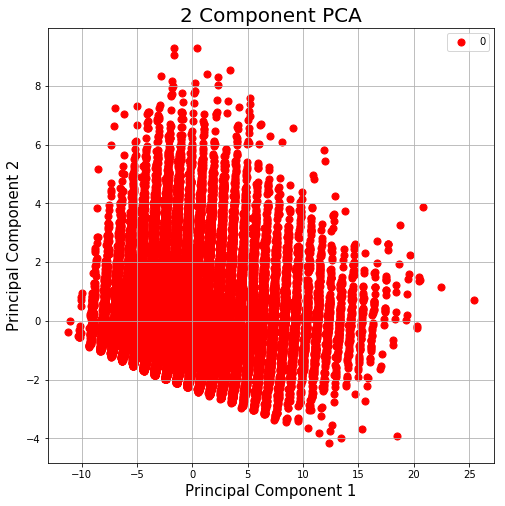

In [120]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


customers = ['0']
colors = ['r']
for customer, color in zip(customers,colors):
    indicesToKeep = finalDf['customer'] == 0
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(customers)
ax.grid()

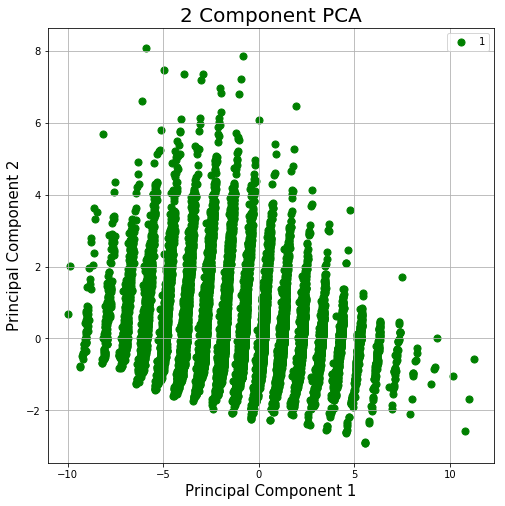

In [121]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


customers = [ '1']
colors = ['g']
for customer, color in zip(customers,colors):
    indicesToKeep = finalDf['customer'] == 1
    
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(customers)
ax.grid()

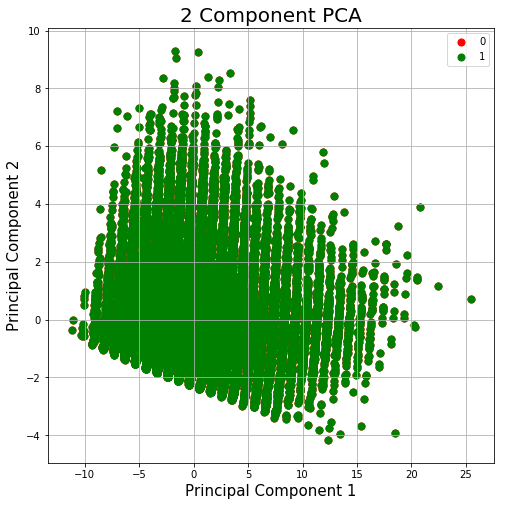

In [122]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


customers = [ '0','1']
colors = ['r','g']
for customer, color in zip(customers,colors):
    indicesToKeep = finalDf['customer'] == 1
    indicesToKeep = finalDf['customer'] == 0
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(customers)
ax.grid()

In [123]:
pca.explained_variance_ratio_

array([0.83488835, 0.08777511])

The explained variance tells us how much information (variance) can be attributed to each of the principal components.
The first principal component contains 83.48% of the variance and the second principal component contains 8.7% of the variance